In [40]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('9Gauss.csv',header=None, names=['x','y','class'], sep=';')
data.head()

,x,y,class
0,10300000,13300000,0
1,7100000,12700000,0
2,11600000,5800000,0
3,14200000,10900000,0
4,3400000,12700000,0


In [42]:
data.isnull().sum()

x        0
y        0
class    0
dtype: int64

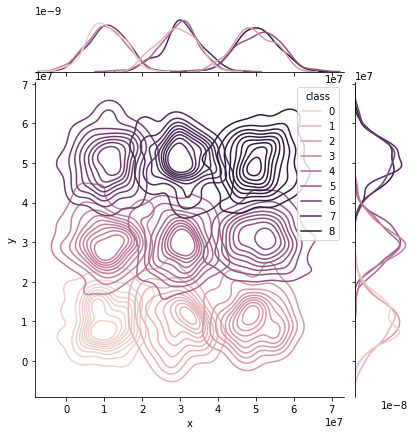

In [43]:
sns.jointplot(data=data, x='x', y='y', hue='class', kind='kde')

In [44]:
def euclidian (p1, p2):
    [x1, y1], [x2, y2] = p1, p2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)
    
def get_closest_group(centroids, point):
    d = dict()
    for (group, centroid) in centroids:
        d[group] = euclidian(centroid, point)

    return min(d, key=d.get)

def points_average(points):
    avg_x, avg_y = 0, 0
    for [x,y] in points:
        avg_x = avg_x + x
        avg_y = avg_y + y

    n = len(points)
    avg_x = avg_x / n
    avg_y = avg_y / n

    return [avg_x, avg_y]

def get_group_mean(points, group):
    group_points = list(map(lambda x: x[1], (filter(lambda x: x[0] == group, points))))
    return points_average(group_points)

def get_centroids_diff(centroids, new_centroids):
    diffs = []
    for i in range(0, len(centroids)):
        old_pt = centroids[i][1]
        new_pt = new_centroids[i][1]

        diffs.append(max(new_pt[0] - old_pt[0], new_pt[1] - old_pt[1]))

    return max(diffs)

def kmeans(k, points):
    # Inicializa os protótipos como pontos aleatórios da base; O primeiro atributo dessa tupla é o grupo
    centroids = list(zip(range(1, k+1), list(map(lambda x: [x[0], x[1]], points.sample(k).values))))

    # O primeiro elemento da tupla do array de pontos será o grupo a qual o ponto pertence
    groups = np.arange(0, len(points.values))
    groups.fill(-1)
    points = list(zip(groups, list(map(lambda x: [x[0], x[1]], points.values))))

    # Designa os pontos para o grupo do centroide mais próximo
    iterations, N_ITERATIONS, EPS = 0, 20, 1
    centroid_diff = EPS + 1
    
    while iterations < N_ITERATIONS and centroid_diff >= EPS:
        iterations = iterations + 1
        for (i, (group, point)) in zip(range(0,len(points)), points):
            new_group = get_closest_group(centroids, point)
            points[i] = (new_group, point)

        # Atualiza o centroide
        new_centroids = []
        for (i, (group, centroid)) in zip(range(0, len(points)), centroids):
            new_centroids.append((group, get_group_mean(points, group)))
        
        centroid_diff = get_centroids_diff(centroids, new_centroids)
        centroids = new_centroids
    
    return points, centroids

In [45]:
# points = [(group, pt)]
# centroids = [(group, pt)]
def getJ(points, centroids):
    J = 0
    dict_centroids = dict(centroids)
    for (pt_group, pt) in points:
        group_centroid = dict_centroids[pt_group]
        J = J + euclidian(group_centroid, pt) ** 2
    return J

In [46]:
def getJs(points, N=100):
    Js = []
    for i in range(N):
        grouped_points, centroids = kmeans(9, points)
        Js.append(getJ(grouped_points, centroids))
    
    return Js

In [53]:
def get_random_points(N, min_value = -1600000, max_value = 65400000):
    pts = []
    for i in range(N):
        pts.append([np.random.uniform(min_value, max_value), np.random.uniform(min_value, max_value)])

    return pts

# Js gerados a partir da base de dados:
data_Js = getJs(data[['x', 'y']])

# Js gerados a partir de pontos aleatórios:
random_Js = []
for i in range(100):
    random_points = pd.DataFrame(get_random_points(900))
    random_Js.append(getJs(random_points, N=1)[0])

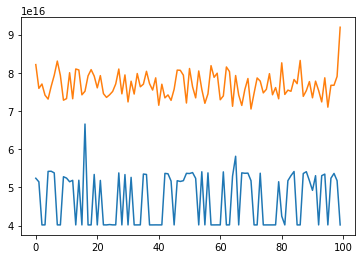

In [54]:
plt.plot(data_Js)
plt.plot(random_Js)